In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./data"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve

creditcard.csv



In [4]:
df_full = pd.read_csv('./data/creditcard.csv')
df_full.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df_full.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df_full.sort_values(by='Class', ascending=False, inplace=True) #easier for stratified sampling
df_full.drop('Time', axis=1,  inplace = True)

In [7]:
df_full.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42635,-7.334341,4.960892,-8.451410,8.174825,-7.237464,-2.382711,-11.508842,4.635798,-6.557760,-11.519861,...,2.153755,0.033922,-0.014095,0.625250,-0.053390,0.164709,1.411047,0.315645,11.38,1
135718,-0.885254,1.790649,-0.945149,3.853433,-1.543510,0.188582,-2.988383,1.344059,-2.294535,-1.886176,...,0.746160,0.550802,-0.034882,-0.567608,-0.528318,0.258782,0.506893,0.176736,7.57,1
10568,-5.268053,9.067613,-15.960728,10.296603,-4.708241,-3.395375,-11.161057,5.499963,-5.667376,-11.627194,...,2.004110,0.191058,0.622928,-1.209264,-0.374799,0.648798,1.584697,0.720056,1.00,1
215132,-2.921944,-0.228062,-5.877289,2.201884,-1.935440,0.631141,-1.245106,1.511348,-1.899987,-6.428231,...,1.441622,0.895528,1.385511,-2.028024,0.509131,0.172643,0.726781,0.234514,723.21,1
144104,-3.365265,2.928541,-5.660999,3.891160,-1.840375,-1.800887,-5.558679,2.402322,-2.848923,-5.995676,...,0.875260,-0.102501,-0.606283,-0.743165,0.096319,-0.135060,1.238695,0.099824,1.00,1


In [8]:
df_sample = df_full.iloc[:3000,:]
df_sample.Class.value_counts()

0    2508
1     492
Name: Class, dtype: int64

In [9]:
feature = np.array(df_sample.values[:,0:29])
label = np.array(df_sample.values[:,-1])

In [10]:
from sklearn.utils import shuffle

shuffle_df = shuffle(df_sample, random_state=42)

df_train = shuffle_df[0:2400]
df_test = shuffle_df[2400:]

In [11]:
train_feature = np.array(df_train.values[:,0:29])
train_label = np.array(df_train.values[:,-1])
test_feature = np.array(df_test.values[:,0:29])
test_label = np.array(df_test.values[:,-1])

In [12]:
train_feature.shape

(2400, 29)

In [13]:
train_label.shape

(2400,)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train_feature)
train_feature_trans = scaler.transform(train_feature)
test_feature_trans = scaler.transform(test_feature)

Using TensorFlow backend.
W1007 11:34:22.086395 4668208576 deprecation_wrapper.py:119] From /Users/trevorburton-mccreadie/anaconda3/envs/fraud/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1007 11:34:22.120425 4668208576 deprecation_wrapper.py:119] From /Users/trevorburton-mccreadie/anaconda3/envs/fraud/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1007 11:34:22.123545 4668208576 deprecation_wrapper.py:119] From /Users/trevorburton-mccreadie/anaconda3/envs/fraud/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1007 11:34:22.145820 4668208576 deprecation_wrapper.py:119] From /Users/trevorburton-mccreadie/anaconda3/envs/fraud/lib/python3.7/site-packages/keras/ba

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               6000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 46,401
Trainable params: 46,401
Non-trainable params: 0
_________________________________________________________________
None
Train on 479 samples, validate on 1921 samples
Epoch 1/200
 - 3s - loss: 0.6912 - acc: 0.6263 - val_loss: 0.6790 - val_acc: 0.8360
Ep

Epoch 86/200
 - 0s - loss: 0.1480 - acc: 0.9582 - val_loss: 0.1480 - val_acc: 0.9589
Epoch 87/200
 - 0s - loss: 0.1578 - acc: 0.9624 - val_loss: 0.1461 - val_acc: 0.9589
Epoch 88/200
 - 0s - loss: 0.1477 - acc: 0.9645 - val_loss: 0.1447 - val_acc: 0.9589
Epoch 89/200
 - 0s - loss: 0.1509 - acc: 0.9520 - val_loss: 0.1436 - val_acc: 0.9589
Epoch 90/200
 - 0s - loss: 0.1516 - acc: 0.9603 - val_loss: 0.1416 - val_acc: 0.9589
Epoch 91/200
 - 0s - loss: 0.1337 - acc: 0.9603 - val_loss: 0.1393 - val_acc: 0.9589
Epoch 92/200
 - 0s - loss: 0.1361 - acc: 0.9624 - val_loss: 0.1367 - val_acc: 0.9610
Epoch 93/200
 - 0s - loss: 0.1359 - acc: 0.9624 - val_loss: 0.1348 - val_acc: 0.9625
Epoch 94/200
 - 0s - loss: 0.1395 - acc: 0.9624 - val_loss: 0.1335 - val_acc: 0.9625
Epoch 95/200
 - 0s - loss: 0.1321 - acc: 0.9645 - val_loss: 0.1329 - val_acc: 0.9625
Epoch 96/200
 - 0s - loss: 0.1346 - acc: 0.9603 - val_loss: 0.1328 - val_acc: 0.9610
Epoch 97/200
 - 0s - loss: 0.1281 - acc: 0.9624 - val_loss: 0.131

Epoch 182/200
 - 0s - loss: 0.0778 - acc: 0.9854 - val_loss: 0.1128 - val_acc: 0.9714
Epoch 183/200
 - 0s - loss: 0.0609 - acc: 0.9812 - val_loss: 0.1127 - val_acc: 0.9714
Epoch 184/200
 - 0s - loss: 0.0715 - acc: 0.9812 - val_loss: 0.1132 - val_acc: 0.9708
Epoch 185/200
 - 0s - loss: 0.0671 - acc: 0.9854 - val_loss: 0.1135 - val_acc: 0.9714
Epoch 186/200
 - 0s - loss: 0.0666 - acc: 0.9854 - val_loss: 0.1134 - val_acc: 0.9714
Epoch 187/200
 - 0s - loss: 0.0674 - acc: 0.9812 - val_loss: 0.1133 - val_acc: 0.9714
Epoch 188/200
 - 0s - loss: 0.0684 - acc: 0.9833 - val_loss: 0.1130 - val_acc: 0.9719
Epoch 189/200
 - 0s - loss: 0.0694 - acc: 0.9854 - val_loss: 0.1131 - val_acc: 0.9714
Epoch 190/200
 - 0s - loss: 0.0686 - acc: 0.9833 - val_loss: 0.1138 - val_acc: 0.9714
Epoch 191/200
 - 0s - loss: 0.0683 - acc: 0.9812 - val_loss: 0.1144 - val_acc: 0.9708
Epoch 192/200
 - 0s - loss: 0.0653 - acc: 0.9854 - val_loss: 0.1148 - val_acc: 0.9708
Epoch 193/200
 - 0s - loss: 0.0685 - acc: 0.9833 - val

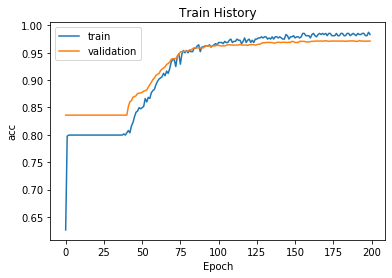

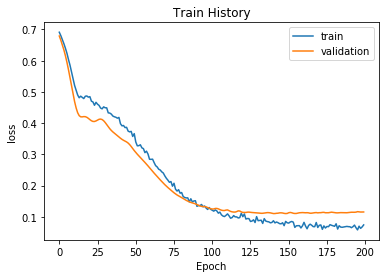

600/600 [==============================] - 0s 46us/step


accuracy= 0.98
model saved to disk


In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

import matplotlib.pyplot as plt 
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

model = Sequential() #一層一層到底，按順序

#輸入層（隱藏層1）
model.add(Dense(units=200, 
                input_dim=29, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

#隱藏層2，不用寫input_dim，因為就是前一層的units
model.add(Dense(units=200,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

#輸出層
model.add(Dense(units=1, #輸出一個數字 
                kernel_initializer='uniform',
                activation='sigmoid'))

print(model.summary()) #可以清楚看到model還有參數數量

model.compile(loss='binary_crossentropy',   #二元用binary
              optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=train_feature_trans, y=train_label,  #上面多分割一步在keras是內建的
                          validation_split=0.8, epochs=200, 
                          batch_size=500, verbose=2) #verbose=2表示顯示訓練過程

######################### 訓練過程視覺化
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


######################### 實際測驗得分
scores = model.evaluate(test_feature_trans, test_label)
print('\n')
print('accuracy=',scores[1])

######################### 紀錄模型預測情形（答案卷）
prediction = model.predict_classes(test_feature_trans)

#儲存訓練結果
model.save_weights("Keras_CreditCardFraud_MLP.h5")
print('model saved to disk')

In [16]:
df_ans = pd.DataFrame({'Real Class' :test_label})
df_ans['Prediction'] = prediction

In [17]:
df_ans[ df_ans['Real Class'] != df_ans['Prediction'] ]

,Real Class,Prediction
110,1.0,0
163,0.0,1
224,1.0,0
265,0.0,1
283,0.0,1
308,1.0,0
345,1.0,0
357,1.0,0
378,1.0,0
484,0.0,1


In [18]:
df_ans['Prediction'].value_counts()

0    521
1     79
Name: Prediction, dtype: int64

In [19]:
df_ans['Real Class'].value_counts()

0.0    519
1.0     81
Name: Real Class, dtype: int64

total test case number:  600


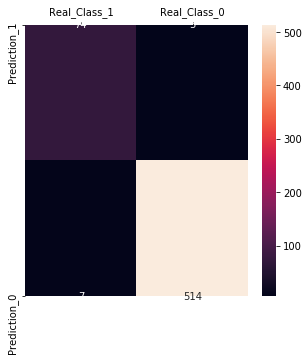

In [20]:
import seaborn as sns
%matplotlib inline

cols = ['Real_Class_1','Real_Class_0']  #Gold standard
rows = ['Prediction_1','Prediction_0'] #diagnostic tool (our prediction)

B1P1 = len(df_ans[(df_ans['Prediction'] == df_ans['Real Class']) & (df_ans['Real Class'] == 1)])
B1P0 = len(df_ans[(df_ans['Prediction'] != df_ans['Real Class']) & (df_ans['Real Class'] == 1)])
B0P1 = len(df_ans[(df_ans['Prediction'] != df_ans['Real Class']) & (df_ans['Real Class'] == 0)])
B0P0 = len(df_ans[(df_ans['Prediction'] == df_ans['Real Class']) & (df_ans['Real Class'] == 0)])

conf = np.array([[B1P1,B0P1],[B1P0,B0P0]])
df_cm = pd.DataFrame(conf, columns = [i for i in cols], index = [i for i in rows])

f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(df_cm, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

print('total test case number: ', np.sum(conf))

In [21]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

model_efficacy(conf)

total_num:  600
G1P1:  74
G0P1:  5
G1P0:  7
G0P0:  514
##########################
sensitivity:  0.9135802469135802
specificity:  0.9865642994241842
false_positive_rate:  0.009633911368015413
false_negative_rate:  0.08641975308641975


(600,
 0.9135802469135802,
 0.9865642994241842,
 0.009633911368015413,
 0.08641975308641975)

In [22]:
df_sample2 = df_full.iloc[:,:] #由於都是label=0，就不shuffle了

feature2 = np.array(df_sample2.values[:,0:29])
label2 = np.array(df_sample2.values[:,-1])

feature2_trans = scaler.transform(feature2) #using the same scaler as above

######################### 實際測驗得分
scores = model.evaluate(feature2_trans, label2)
print('\n')
print('accuracy=',scores[1])

######################### 紀錄模型預測情形（答案卷）
prediction2 = model.predict_classes(feature2_trans)

284807/284807 [==============================] - 11s 39us/step


accuracy= 0.9864504734785311


In [23]:
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = label2.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.10      0.88      0.18       492

    accuracy                           0.99    284807
   macro avg       0.55      0.93      0.59    284807
weighted avg       1.00      0.99      0.99    284807

[[280514   3801]
 [    58    434]]


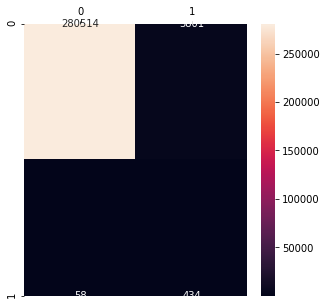

In [24]:
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

In [25]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

model_efficacy(conf)

total_num:  284807
G1P1:  280514
G0P1:  3801
G1P0:  58
G0P0:  434
##########################
sensitivity:  0.9997932794434227
specificity:  0.8821138211382114
false_positive_rate:  0.8975206611570248
false_negative_rate:  0.00020672055657727784


(284807,
 0.9997932794434227,
 0.8821138211382114,
 0.8975206611570248,
 0.00020672055657727784)

In [27]:
input_nodes = [node.op.name for node in model.inputs]
output_nodes = [node.op.name for node in model.outputs]

print('input nodes => ' + str(input_nodes))
print('output nodes => ' + str(output_nodes))

input nodes => ['dense_1_input']
output nodes => ['dense_3/Sigmoid']


In [35]:
import keras
import tensorflow as tf
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib

MODEL_NAME = 'yetAnotherModel'
MODEL_PATH = './output/' + MODEL_NAME + '/'
OPTIMISED_MODEL_PATH = '../pipelines/src/main/resources/models/'
OPTIMISED_MODEL_NAME = 'optimised_' + MODEL_NAME + '.pb'
OPTIMISED_MODEL_TXT_NAME = 'optimised_' + MODEL_NAME + '.pbtxt'

checkpoint_path = MODEL_PATH + MODEL_NAME + '.ckpt'
model_frozen_path = MODEL_PATH + 'frozen_' + MODEL_NAME + '.pb'

sess = keras.backend.get_session()

In [30]:
# Save produced model
saver = tf.train.Saver()

save_path = saver.save(sess, checkpoint_path)
print ("Saved model at ", save_path)

graph_path = tf.train.write_graph(sess.graph_def, MODEL_PATH, MODEL_NAME + ".pb", as_text=True)
print ("Saved graph at :", graph_path)

Saved model at  ./output/yetAnotherModel/yetAnotherModel.ckpt
Saved graph at : ./output/yetAnotherModel/yetAnotherModel.pb


In [31]:
# Now freeze the graph (put variables into graph)

input_saver_def_path = ""
input_binary = False
output_node_names = ', '.join(output_nodes)
restore_op_name = "save/restore_all"
filename_tensor_name = "save/Const:0"
clear_devices = True


freeze_graph.freeze_graph(graph_path, input_saver_def_path,
                         input_binary, save_path, output_node_names,
                         restore_op_name, filename_tensor_name,
                         model_frozen_path, clear_devices, "")

print ("Model is frozen")

W1007 11:41:05.555653 4668208576 deprecation.py:323] From /Users/trevorburton-mccreadie/anaconda3/envs/fraud/lib/python3.7/site-packages/tensorflow/python/tools/freeze_graph.py:127: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
W1007 11:41:06.142923 4668208576 deprecation.py:323] From /Users/trevorburton-mccreadie/anaconda3/envs/fraud/lib/python3.7/site-packages/tensorflow/python/tools/freeze_graph.py:233: convert_variables_to_constants (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
W1007 11:41:06.144479 4668208576 deprecation.py:323] From /Users/trevorburton-mccreadie/anaconda3/envs/fraud/lib/python3.7/site-packages/tensorflow/python/framework/graph_util_impl.py:270: extrac

Model is frozen


In [32]:
# optimizing graph

input_graph_def = tf.GraphDef()
with tf.gfile.Open(model_frozen_path, "rb") as f:
   data = f.read()
   input_graph_def.ParseFromString(data)


output_graph_def = optimize_for_inference_lib.optimize_for_inference(
   input_graph_def,
   input_nodes,      # an array of the input node(s)
   output_nodes,      # an array of output nodes
   tf.float32.as_datatype_enum)

W1007 11:41:27.923722 4668208576 deprecation.py:323] From /Users/trevorburton-mccreadie/anaconda3/envs/fraud/lib/python3.7/site-packages/tensorflow/python/tools/optimize_for_inference_lib.py:113: remove_training_nodes (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.remove_training_nodes`


In [36]:
tf.train.write_graph(output_graph_def, OPTIMISED_MODEL_PATH, OPTIMISED_MODEL_NAME, as_text=False)

'../pipelines/src/main/resources/models/optimised_yetAnotherModel.pb'

In [ ]:
tf.train.write_graph(output_graph_def, MODEL_PATH, OPTIMISED_MODEL_TXT_NAME, as_text=True)